In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")


In [95]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [96]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [98]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [99]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


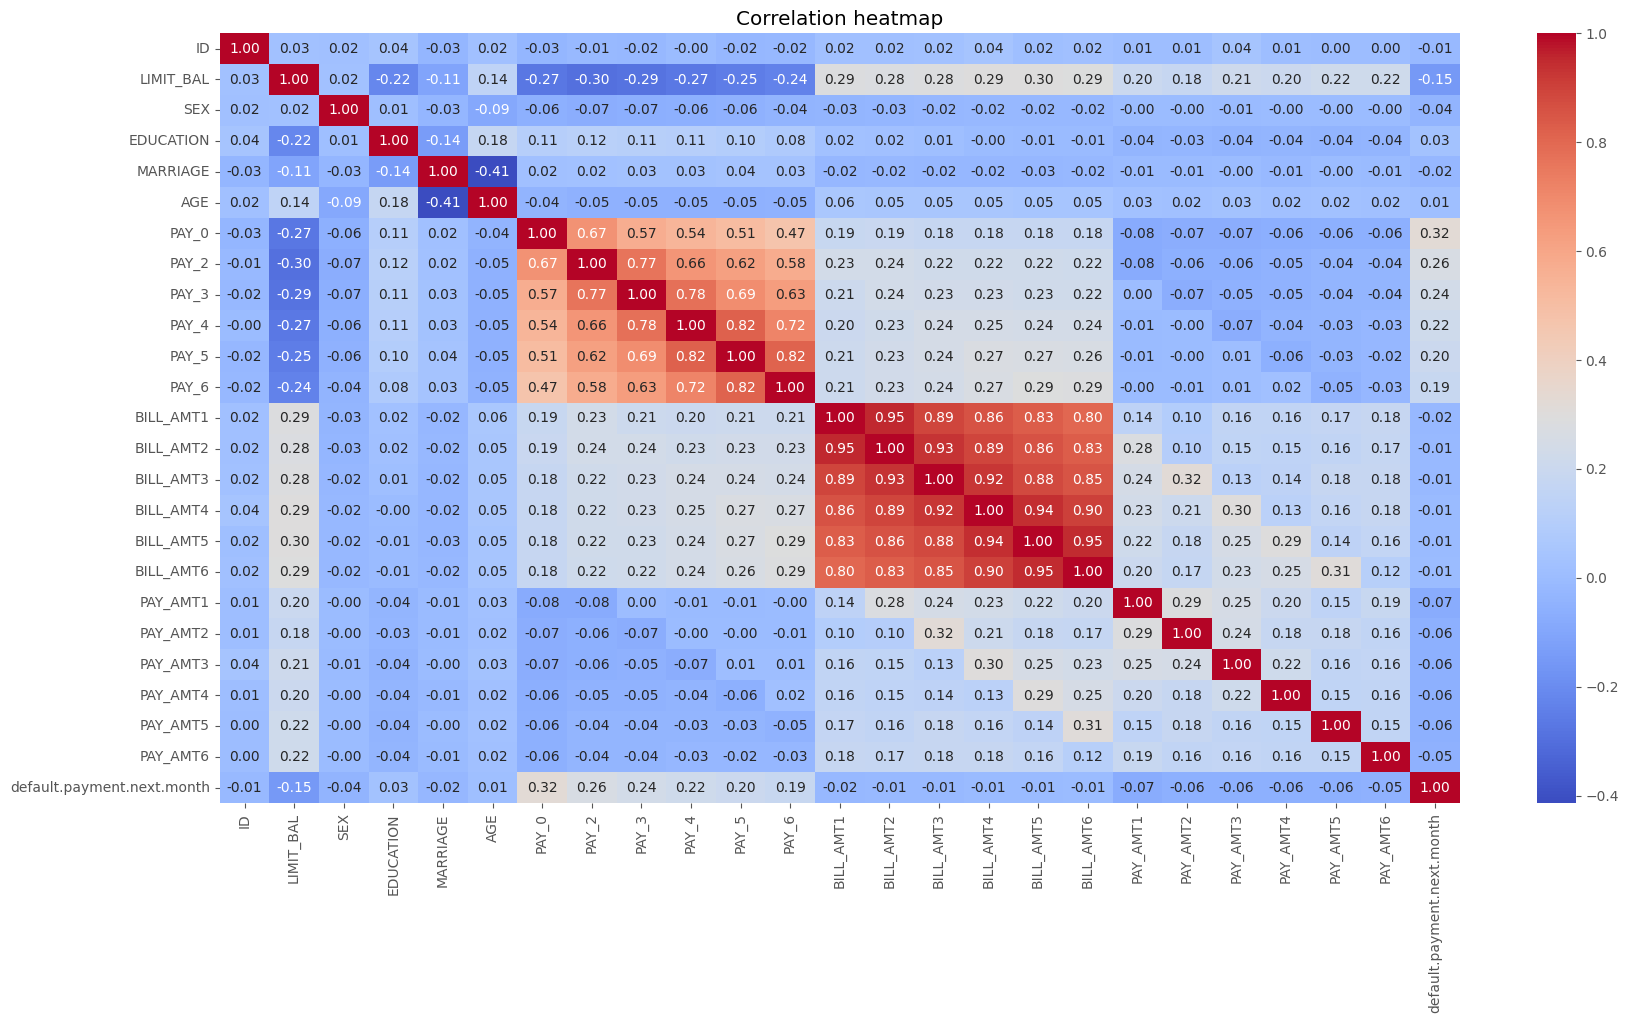

In [102]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

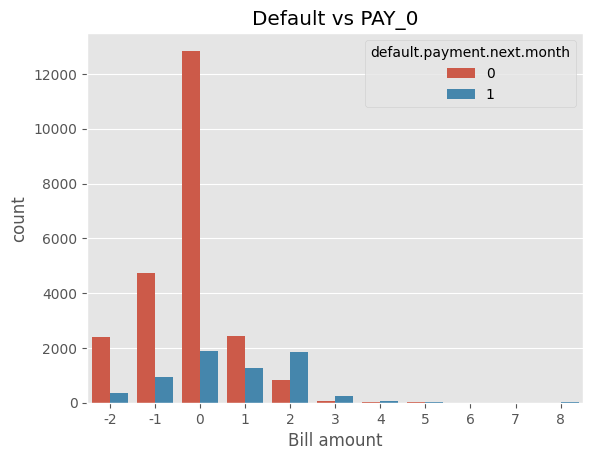

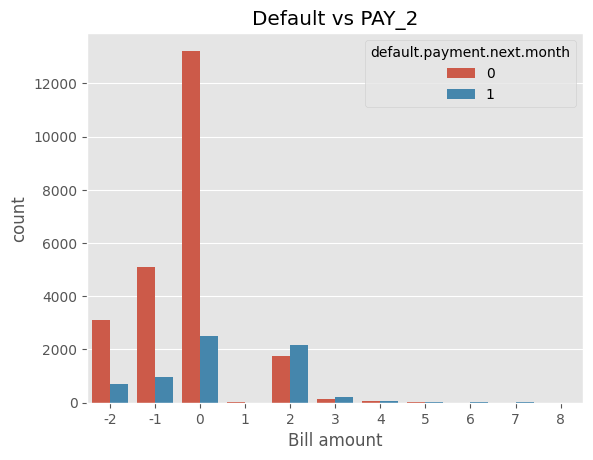

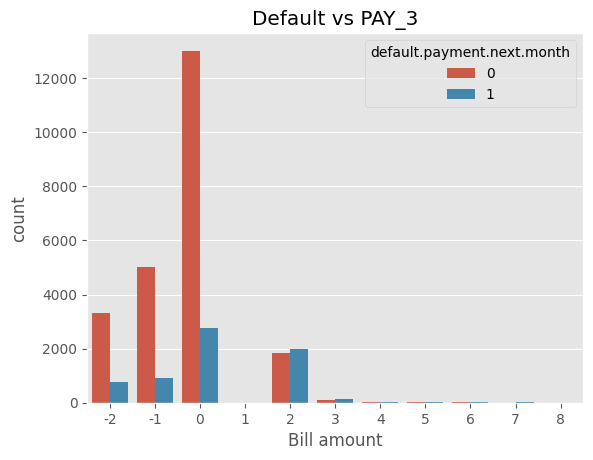

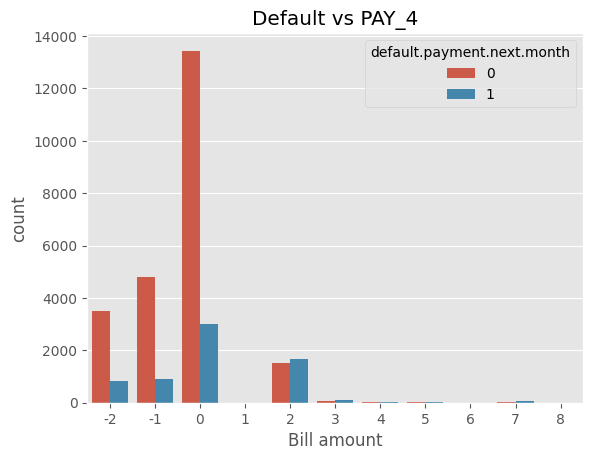

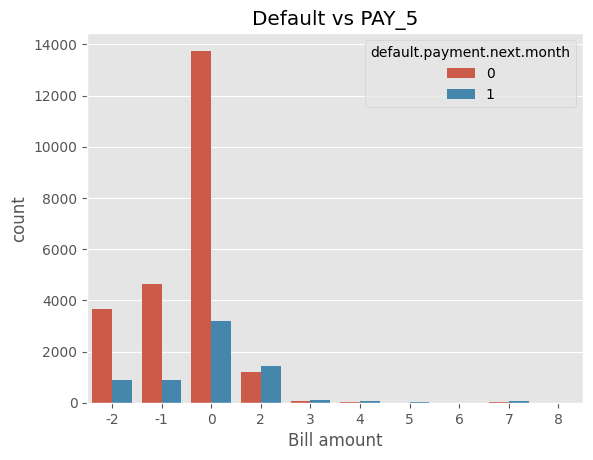

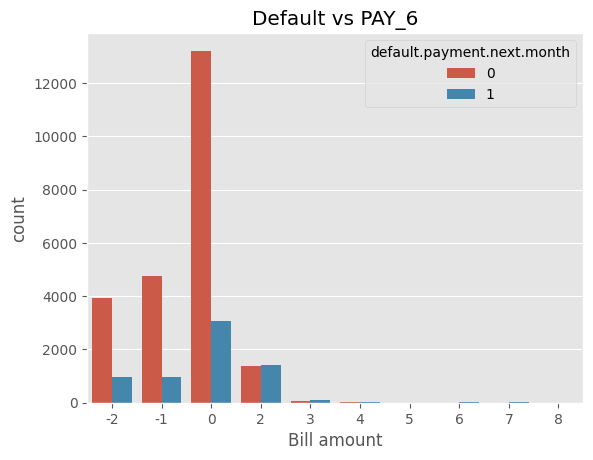

In [103]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
  sns.countplot(x=col, hue="default.payment.next.month",data=df)
  plt.title(f"Default vs {col}")
  plt.xlabel("Bill amount")
  plt.show()

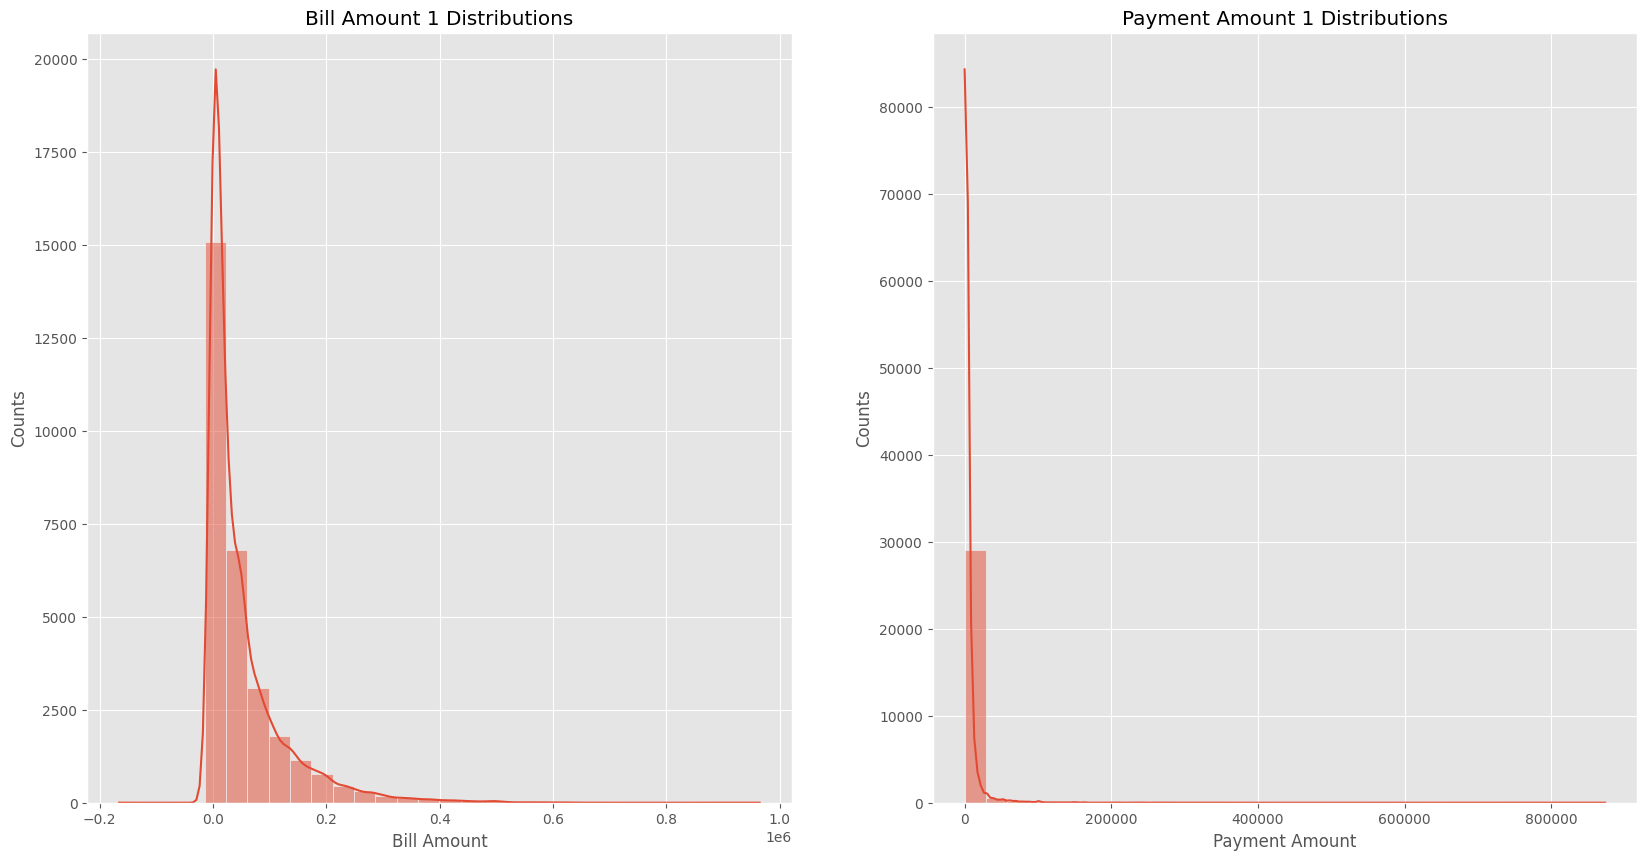

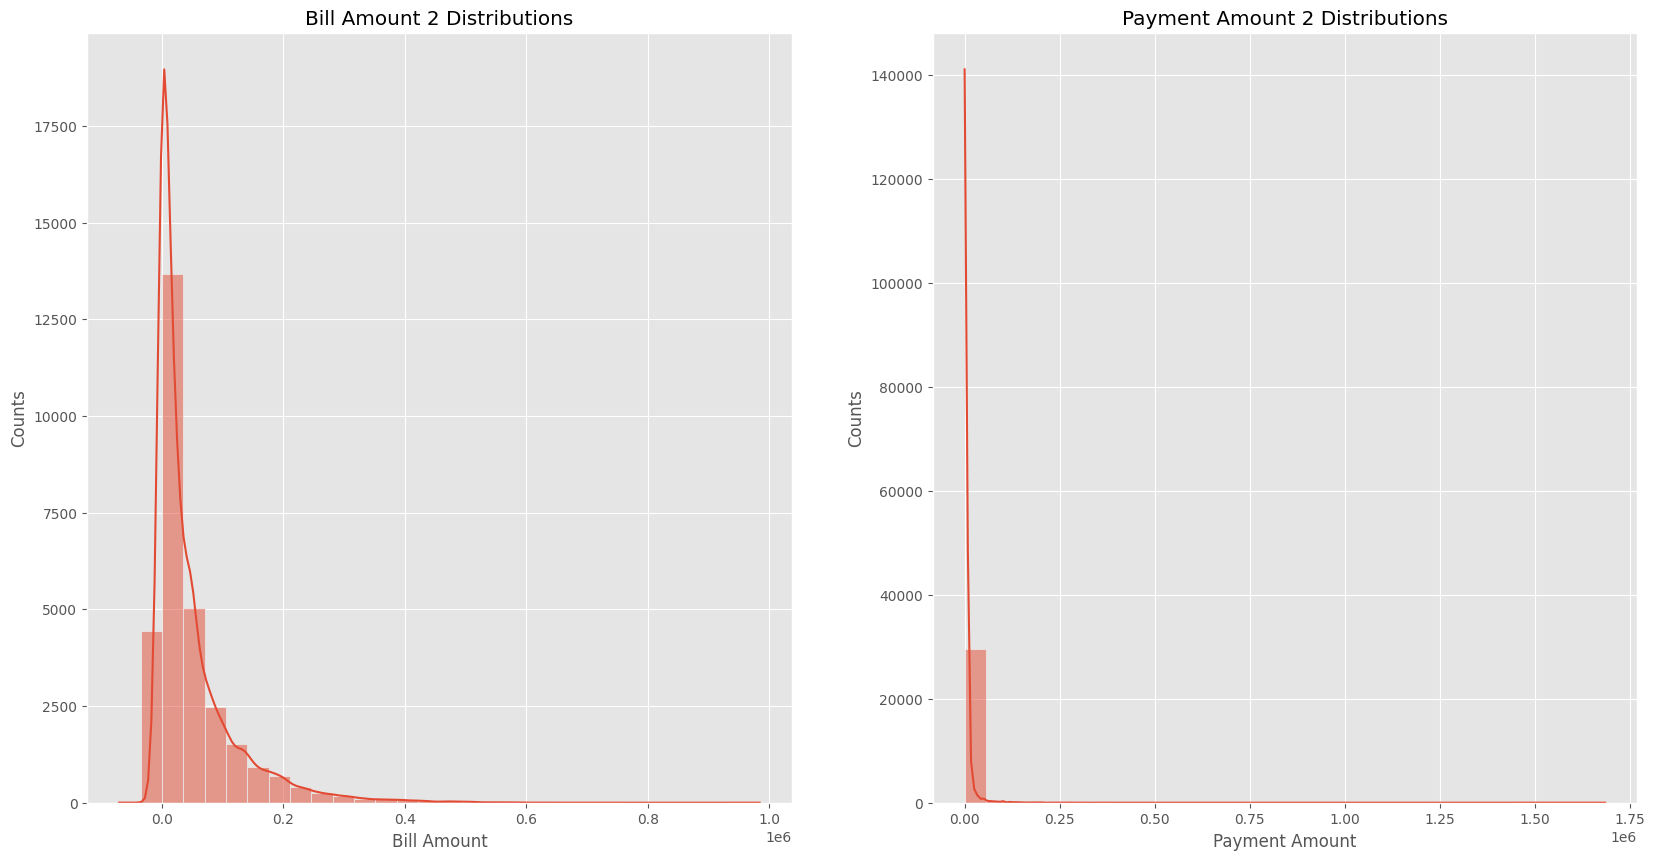

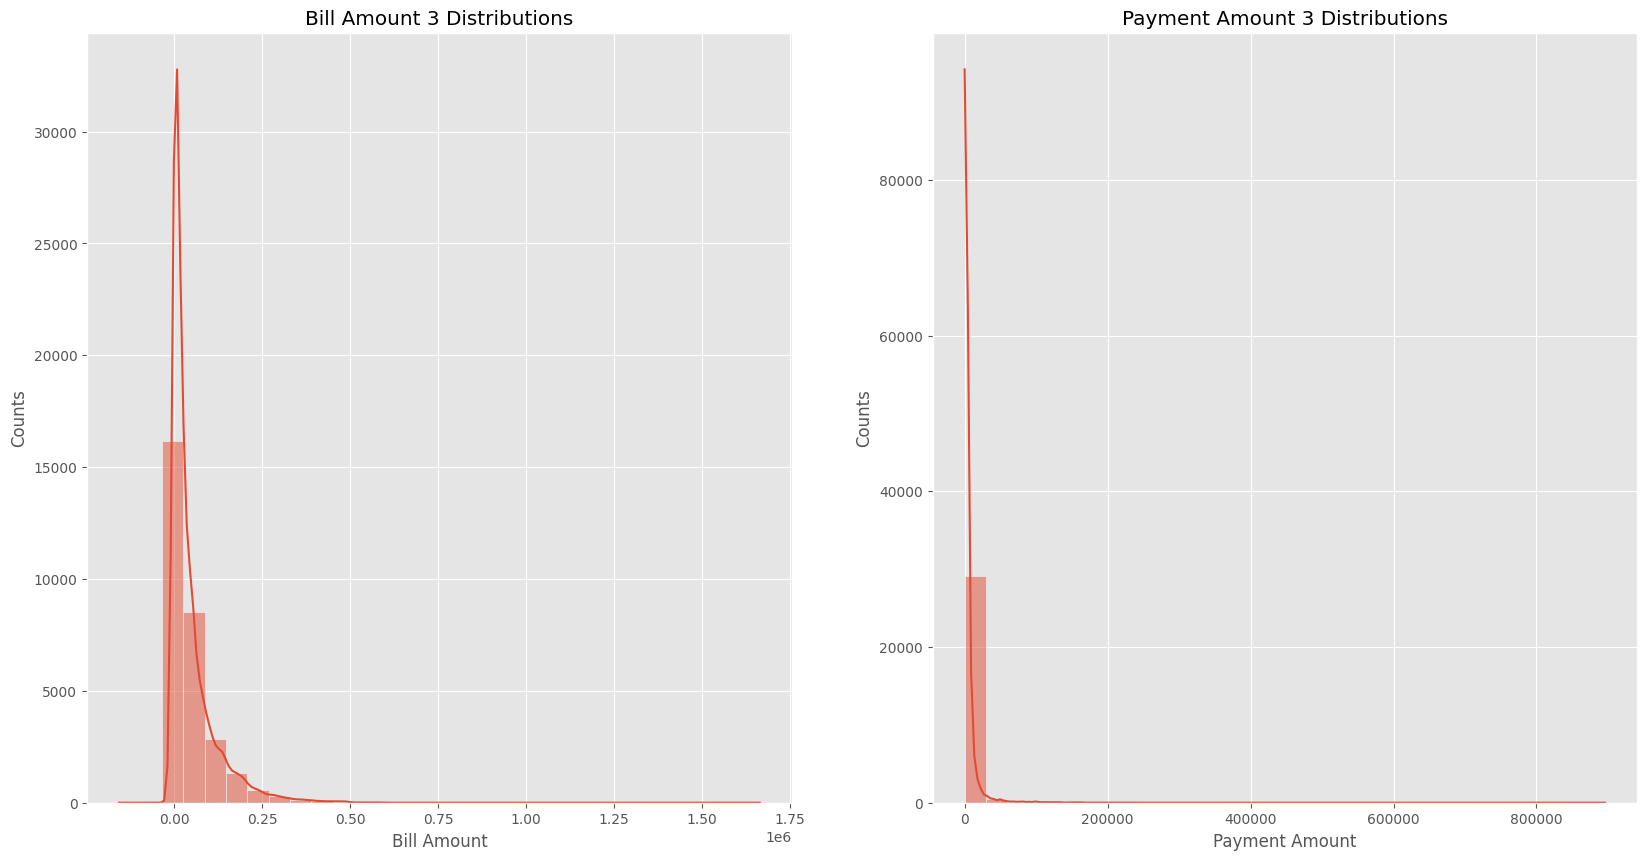

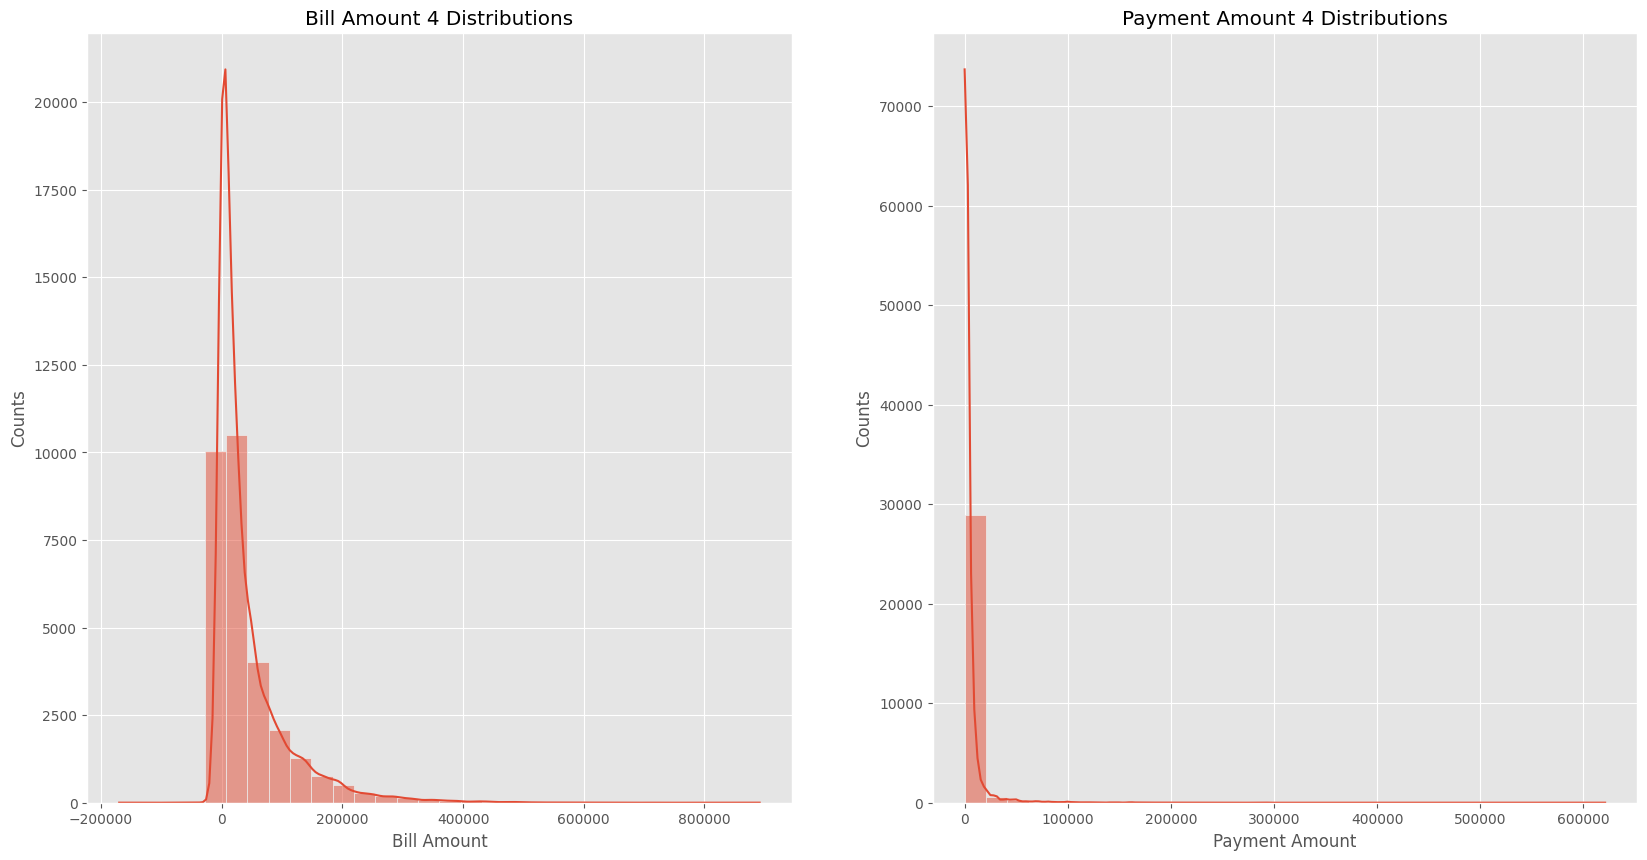

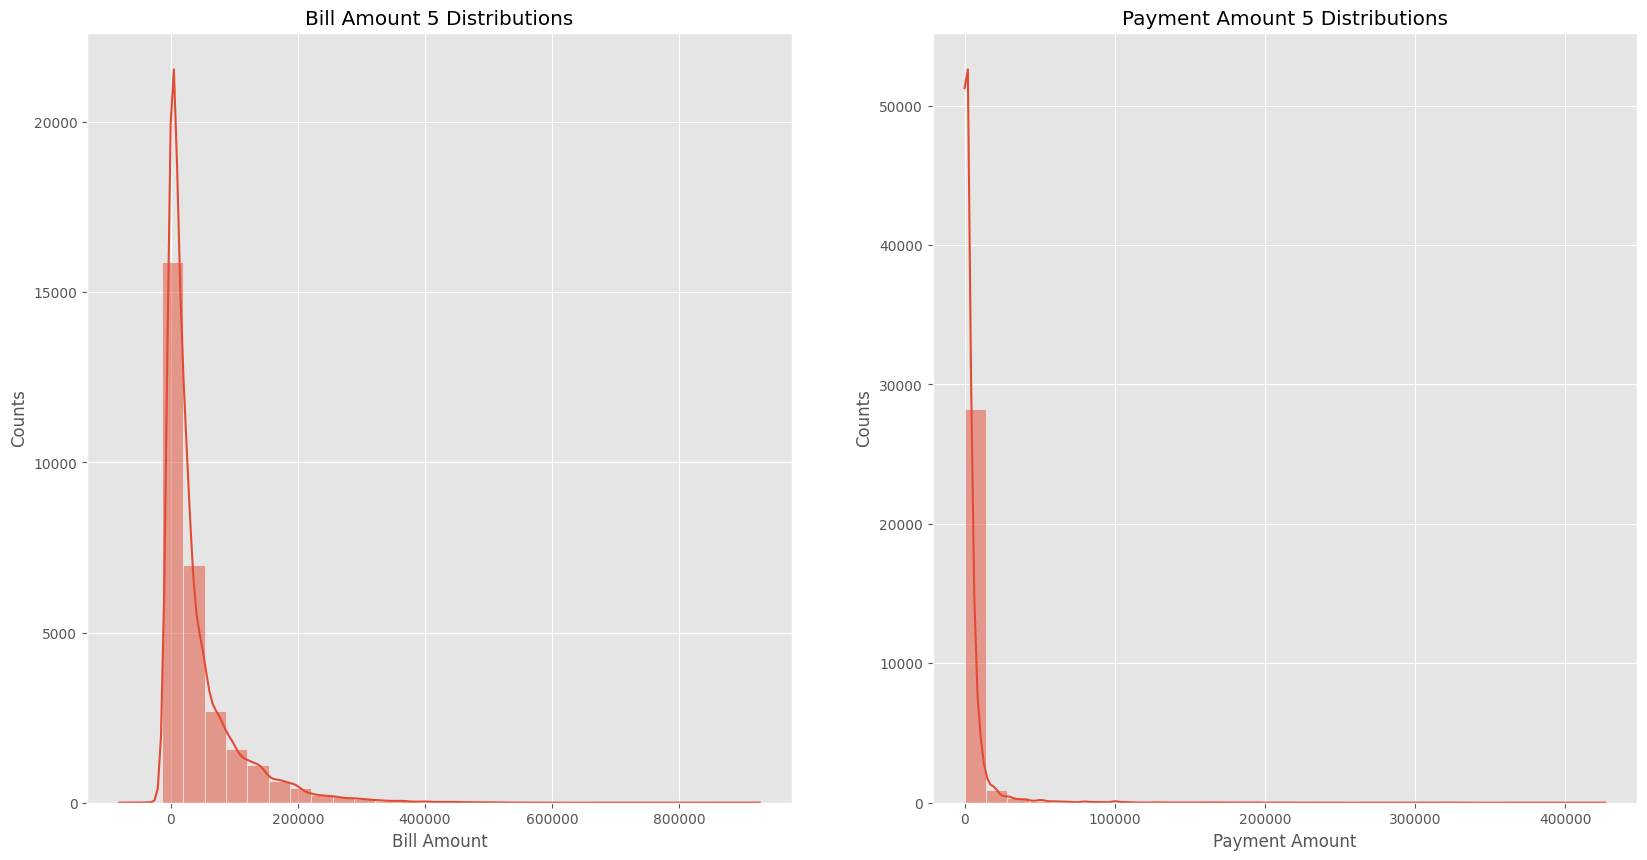

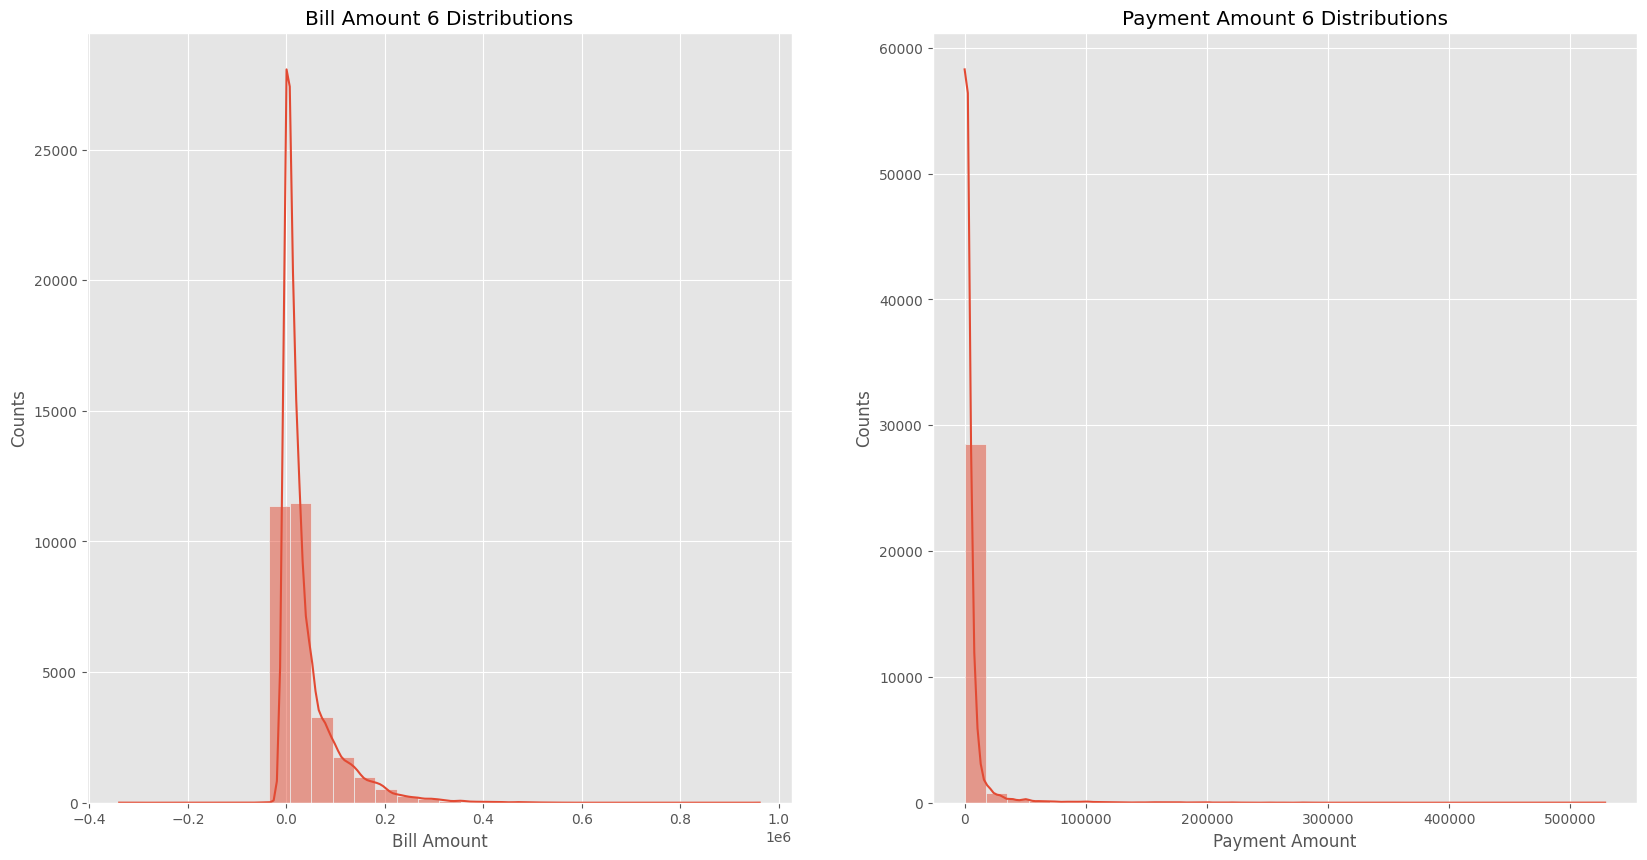

In [104]:
for i in range(1,7):
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.histplot(df[f"BILL_AMT{i}"],bins=30,kde=True)
  plt.title(f"Bill Amount {i} Distributions")
  plt.xlabel("Bill Amount")
  plt.ylabel("Counts")

  plt.subplot(1,2,2)
  sns.histplot(df[f"PAY_AMT{i}"],bins=30,kde=True)
  plt.title(f"Payment Amount {i} Distributions")
  plt.xlabel("Payment Amount")
  plt.ylabel("Counts")

  plt.show()

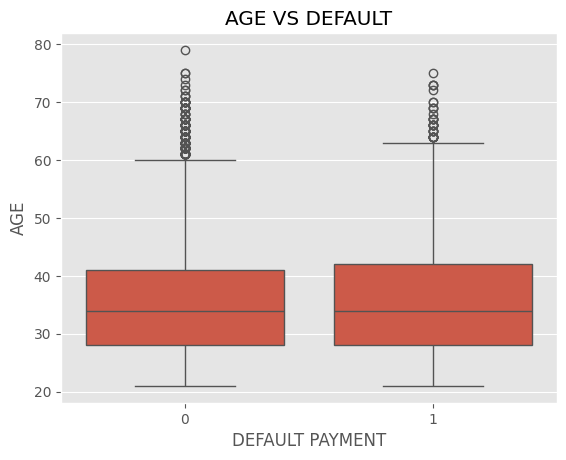

In [105]:
sns.boxplot(x="default.payment.next.month",y="AGE",data=df)
plt.title("AGE VS DEFAULT")
plt.xlabel("DEFAULT PAYMENT")
plt.ylabel("AGE")
plt.show()

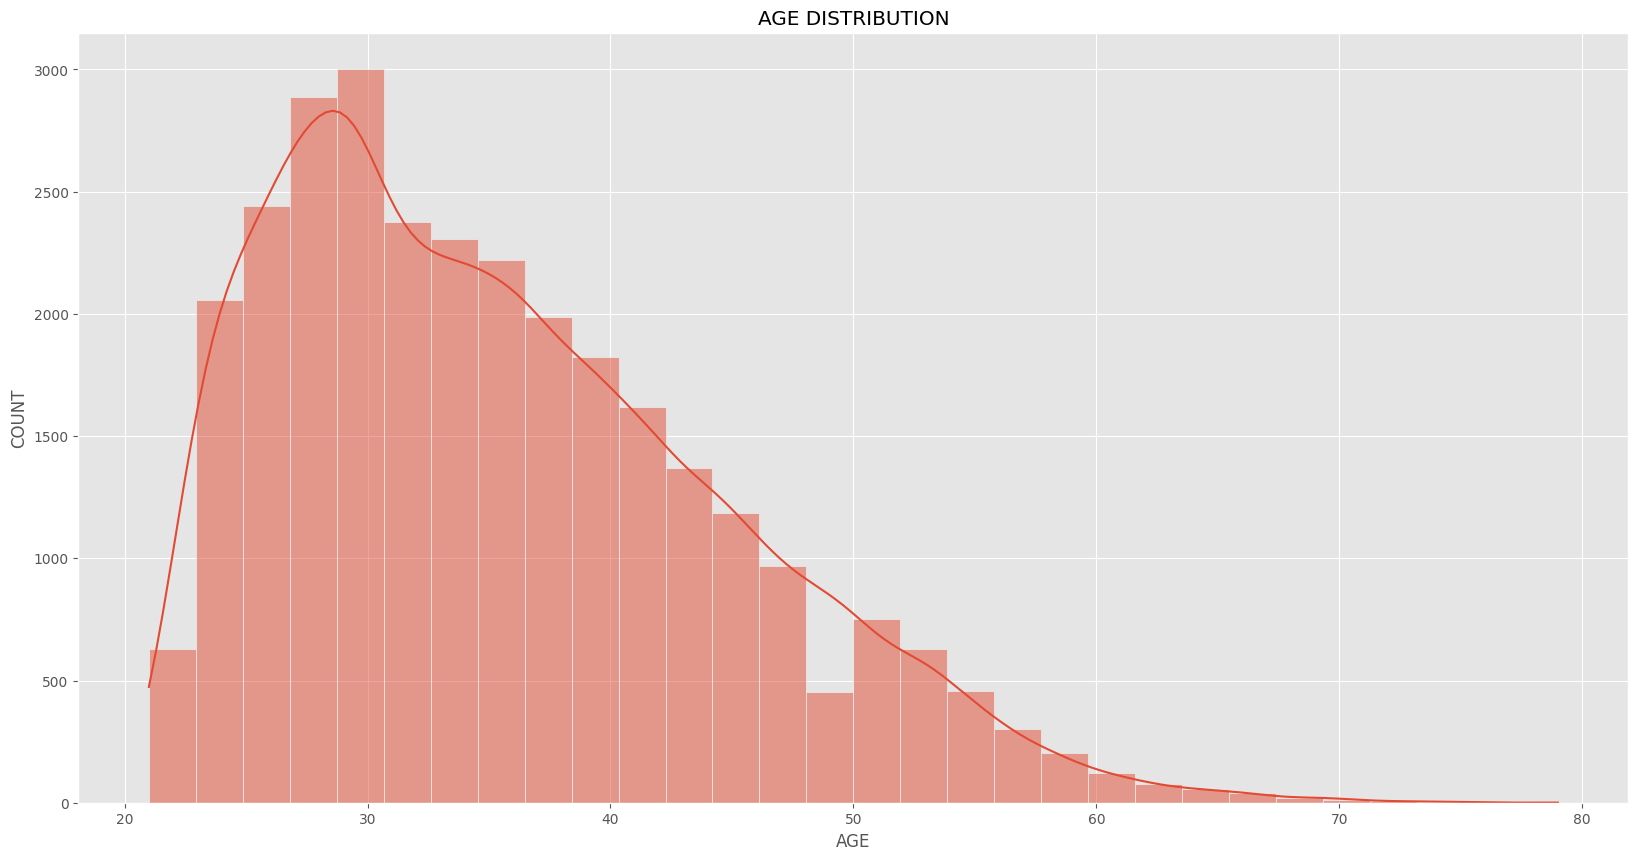

In [106]:
plt.figure(figsize=(20,10))
sns.histplot(df["AGE"],bins=30,kde=True)
plt.title("AGE DISTRIBUTION")
plt.xlabel("AGE")
plt.ylabel("COUNT")

plt.show()

<Axes: >

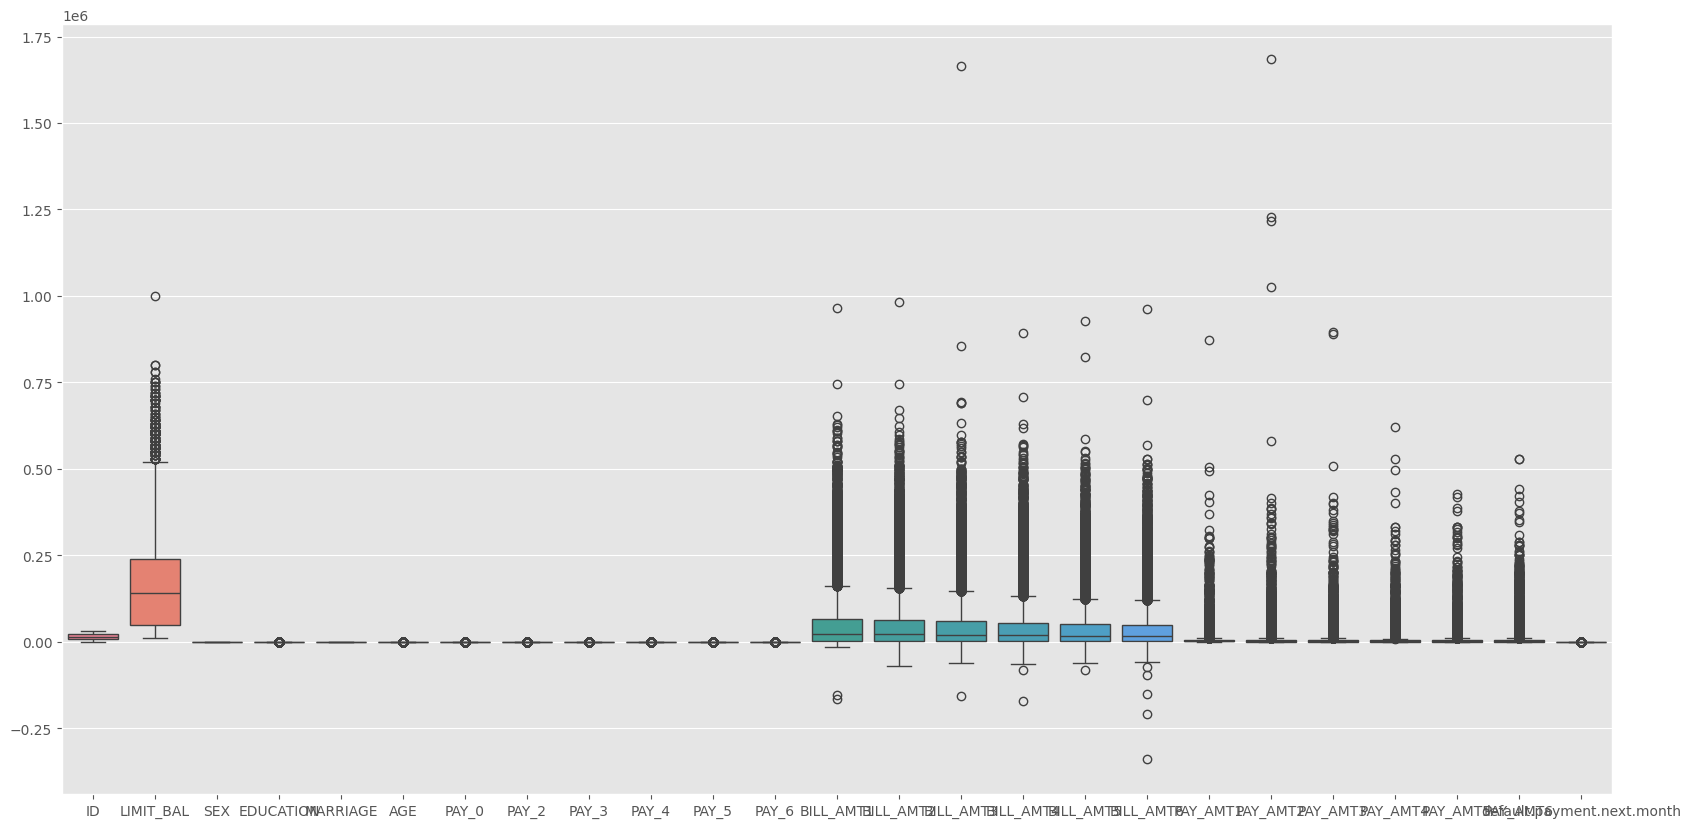

In [107]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [108]:
X = df.drop(['ID','default.payment.next.month'], axis=1)

y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [109]:
df.shape

(30000, 25)

In [110]:
X_train.shape

(24000, 23)

In [111]:
y_train.shape

(24000,)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [113]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}


In [114]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(y_pred)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [115]:
for model, acc in results.items():
    print(f"{model} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8100
Decision Tree Accuracy: 0.7222
Random Forest Accuracy: 0.8137
KNN Accuracy: 0.7950


In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [117]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
accuracy = accuracy_score(y_test, y_pred)

In [119]:
accuracy

0.81

In [120]:
report  = classification_report(y_test, y_pred)

In [121]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [122]:
features_importance = pd.Series(model.coef_[0], index = X.columns)
features_importance = features_importance.abs().sort_values(ascending=False)
print(features_importance)

PAY_0        0.649054
BILL_AMT1    0.364502
PAY_AMT2     0.249047
PAY_AMT1     0.171703
BILL_AMT2    0.125537
BILL_AMT3    0.120595
PAY_2        0.109360
LIMIT_BAL    0.106729
MARRIAGE     0.079040
EDUCATION    0.077808
PAY_3        0.076972
AGE          0.076778
BILL_AMT4    0.060790
SEX          0.056139
PAY_AMT4     0.055655
PAY_4        0.052052
PAY_AMT6     0.047620
BILL_AMT5    0.034406
BILL_AMT6    0.028835
PAY_AMT3     0.024774
PAY_AMT5     0.023396
PAY_5        0.022620
PAY_6        0.014968
dtype: float64


In [123]:
import pickle

In [124]:
pickle.dump(model, open('model.pkl', 'wb'))

In [125]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(Scaler, open("scaler.pkl", "wb"))
